In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("swiggy_file.csv")

In [3]:
df.head()

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


In [5]:
df.isnull().sum()

Restaurant Name          0
Cuisine                 27
Rating                   0
Number of Ratings    14542
Average Price            0
Number of Offers         0
Offer Name            1808
Area                     2
Pure Veg                 0
Location                 0
dtype: int64

observation: cusine, no. of rating and offer no. columns have a missing value 

Handling the missing values

In [8]:
df['Cuisine'] = df['Cuisine'].fillna('Unknown')

In [9]:
df['Number of Ratings'] = df['Number of Ratings'].astype(str) \
    .str.replace(',', '') \
    .str.replace('+', '') \
    .str.replace('ratings', '', case=False) \
    .str.extract(r'(\d+)')  # use r'' for raw string

df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'], errors='coerce').fillna(0).astype(int)

In [10]:
df['Offer Name'] = df['Offer Name'].fillna('No Offer')

In [11]:
df.isnull().sum()

Restaurant Name      0
Cuisine              0
Rating               0
Number of Ratings    0
Average Price        0
Number of Offers     0
Offer Name           0
Area                 2
Pure Veg             0
Location             0
dtype: int64

In [12]:
df['Area'] = df['Area'].fillna('Unknown').str.strip().str.title()

In [13]:
df.isnull().sum()

Restaurant Name      0
Cuisine              0
Rating               0
Number of Ratings    0
Average Price        0
Number of Offers     0
Offer Name           0
Area                 0
Pure Veg             0
Location             0
dtype: int64

In [14]:
# Clean 'Average Price' - extract numeric value from ₹ text
df['Average Price'] = df['Average Price'].astype(str).str.extract(r'(\d+)').astype(float)

# Clean 'Number of Offers' - convert to int and fill missing with 0
df['Number of Offers'] = pd.to_numeric(df['Number of Offers'], errors='coerce').fillna(0).astype(int)

# Convert 'Pure Veg' to binary: Yes = 1, No = 0
df['Pure Veg'] = df['Pure Veg'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Restaurant Name    140657 non-null  object 
 1   Cuisine            140657 non-null  object 
 2   Rating             140657 non-null  object 
 3   Number of Ratings  140657 non-null  int32  
 4   Average Price      140657 non-null  float64
 5   Number of Offers   140657 non-null  int32  
 6   Offer Name         140657 non-null  object 
 7   Area               140657 non-null  object 
 8   Pure Veg           140657 non-null  int32  
 9   Location           140657 non-null  object 
dtypes: float64(1), int32(3), object(6)
memory usage: 9.1+ MB


visualization 

for objective 1

🧠 Insights i’ll Uncover:
1. Which cuisines are most popular and best rated
2. Whether price has any influence on ratings
3. How Pure Veg restaurants compare to others
4. Overall distribution of customer satisfaction

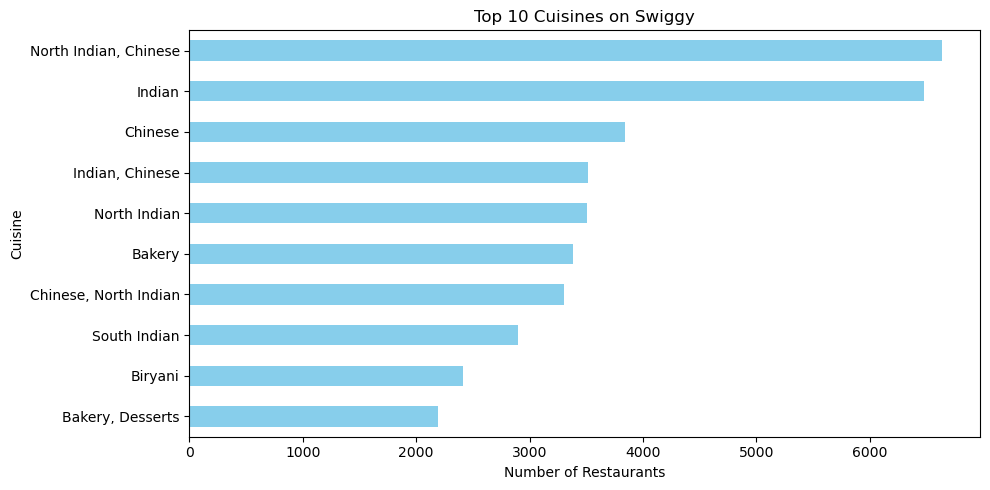

In [18]:
#  Top 10 Most Common Cuisines
plt.figure(figsize=(10,5))
df['Cuisine'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Cuisines on Swiggy')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Observation: The most commonly available cuisines on Swiggy are likely to be North Indian, Chinese, and South Indian.

In [20]:
print(df['Rating'].unique())

['4.0' '3.6' '3.8' '3.5' '4.3' '4.1' '3.9' '4.2' 'NEW' '3.2' '3.3' '3.7'
 '4.5' '--' '4.4' '5.0' '4.6' '4.7' '2.5' '4.8' '2.8' '3.0' '2.9' '3.4'
 '3.1' '2.3' '4.9' '2.7' '2.1' '2.0' '2.6' '2.4' '2.2' '1.5' '1.3' '1.4'
 '1.1' '1.9' '1.6' '1.8' '1.7' '1.0' '1.2']


In [21]:
# Convert 'Rating' to numeric, turn invalid values to NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Restaurant Name    140657 non-null  object 
 1   Cuisine            140657 non-null  object 
 2   Rating             106938 non-null  float64
 3   Number of Ratings  140657 non-null  int32  
 4   Average Price      140657 non-null  float64
 5   Number of Offers   140657 non-null  int32  
 6   Offer Name         140657 non-null  object 
 7   Area               140657 non-null  object 
 8   Pure Veg           140657 non-null  int32  
 9   Location           140657 non-null  object 
dtypes: float64(2), int32(3), object(5)
memory usage: 9.1+ MB


In [23]:
print(df['Rating'].unique())

[4.  3.6 3.8 3.5 4.3 4.1 3.9 4.2 nan 3.2 3.3 3.7 4.5 4.4 5.  4.6 4.7 2.5
 4.8 2.8 3.  2.9 3.4 3.1 2.3 4.9 2.7 2.1 2.  2.6 2.4 2.2 1.5 1.3 1.4 1.1
 1.9 1.6 1.8 1.7 1.  1.2]


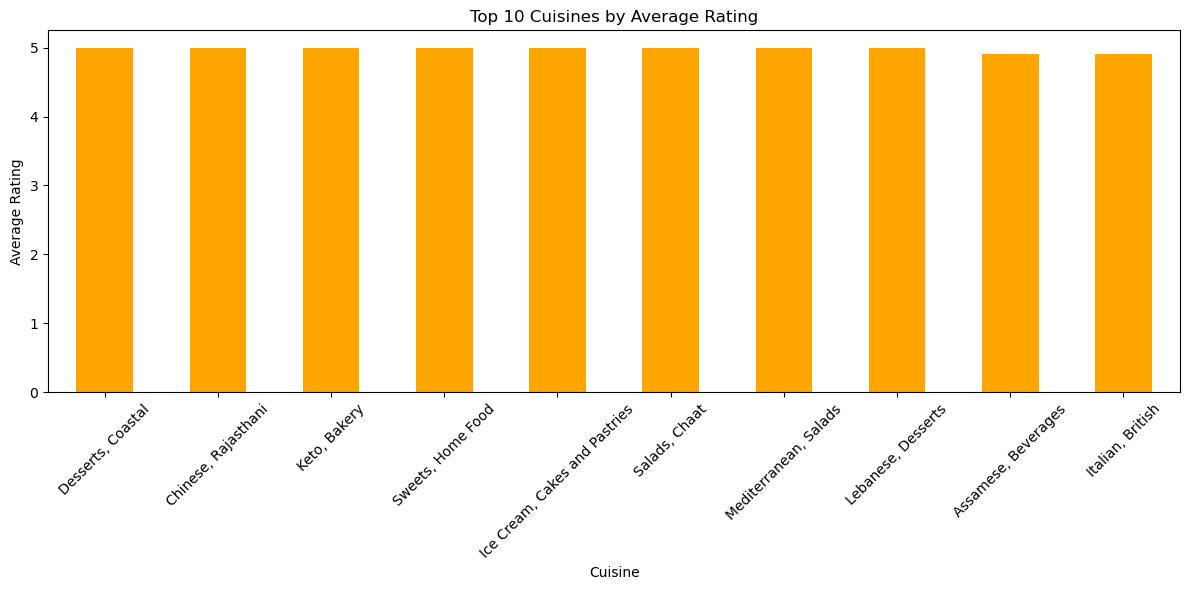

In [24]:
#  Average Rating by Cuisine (Top 10)
plt.figure(figsize=(12,6))
df.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

observation: Customers prefer cuisines like Desserts, Rajasthani, Coastal, and Mediterranean, indicating a strong liking for traditional, healthy, and diverse food options.

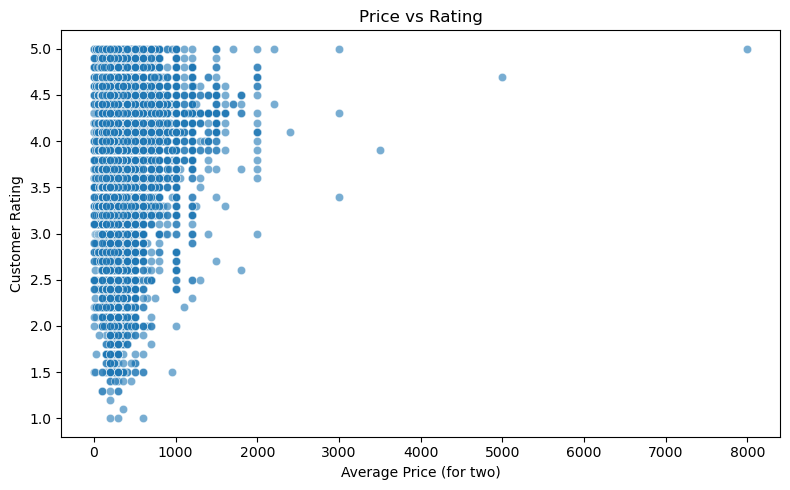

In [26]:
#  Price vs Rating Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Average Price', y='Rating', alpha=0.6)
plt.title('Price vs Rating')
plt.xlabel('Average Price (for two)')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()

observation: The scatter plot shows no strong correlation between average price and customer ratings.

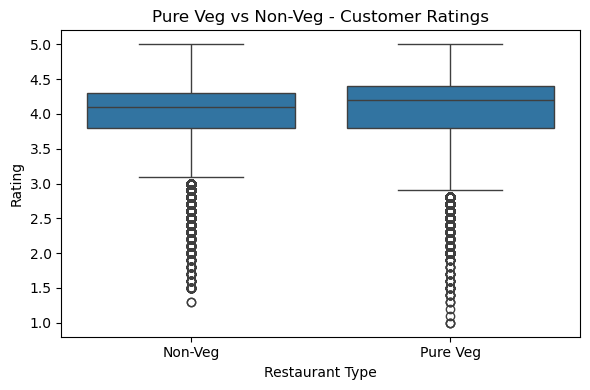

In [28]:
#  Pure Veg vs Non-Veg Ratings
plt.figure(figsize=(6,4))
sns.boxplot(x='Pure Veg', y='Rating', data=df)
plt.title('Pure Veg vs Non-Veg - Customer Ratings')
plt.xticks([0, 1], ['Non-Veg', 'Pure Veg'])
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

observation: Pure Veg restaurants generally have comparable or slightly better ratings than Non-Veg ones.

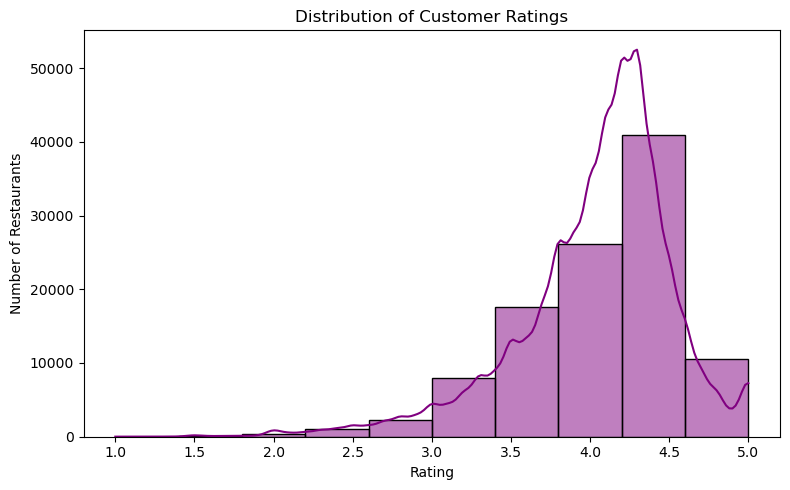

In [30]:
#  Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

observation: Most restaurants have ratings clustered between 3.5-4.5, showing overall positive customer experiences.

Conclusion and Key insights

1. The most commonly available cuisines on Swiggy are likely to be North Indian, Chinese, and South Indian.
2. This reflects strong consumer demand for traditional and familiar foods.
3. Customers prefer cuisines like Desserts, Rajasthani, Coastal, and Mediterranean, indicating a strong liking for traditional, healthy, and diverse food options.
4. This suggests that customers might associate certain cuisines with better quality or taste.
5. The scatter plot shows no strong correlation between average price and customer ratings.
6. This indicates that a higher price does not guarantee better satisfaction — customers value more than just cost.
7. Pure Veg restaurants generally have comparable or slightly better ratings than Non-Veg ones.
8. This highlights a strong vegetarian customer base that’s quite satisfied with the offerings.
9. Most restaurants have ratings clustered between 3.5 and 4.5, showing overall positive customer experiences.
10. Few restaurants fall below 3, suggesting Swiggy maintains a minimum quality threshold.

objective 2

🔍 Insights Uncover:
1. Whether restaurants with offers get higher ratings
2. If cheaper restaurants are more likely to offer discounts
3. Which offer types are most popular across Swiggy

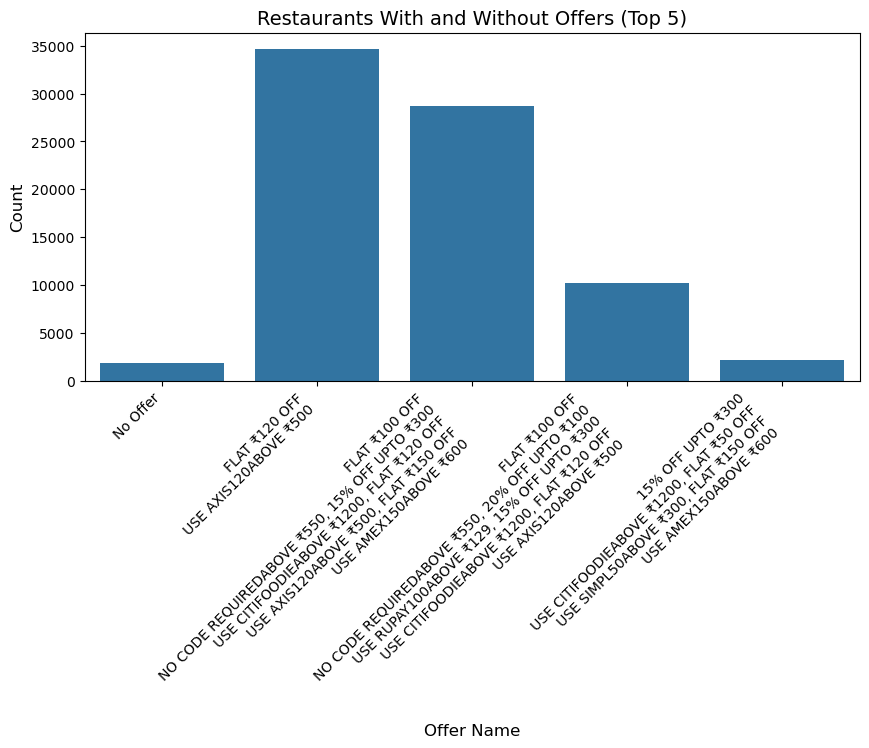

In [36]:
# Count of restaurants with and without offers (improved layout)
plt.figure(figsize=(10,6))
sns.countplot(
    x='Offer Name', 
    data=df, 
    order=['No Offer'] + df['Offer Name'].value_counts().index.drop('No Offer').tolist()[:4]
)
plt.title('Restaurants With and Without Offers (Top 5)', fontsize=14)
plt.xlabel('Offer Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)  # Adds extra space at the bottom
plt.show()

observation: 
1. significant number of restaurants on Swiggy do not offer promotions.
2. Among those that do, a few specific offer types (like flat discounts or "X% off") are much more common.

In [38]:
#  Create a binary 'Has Offer' column
df['Has Offer'] = df['Offer Name'].apply(lambda x: 0 if x == 'No Offer' else 1)

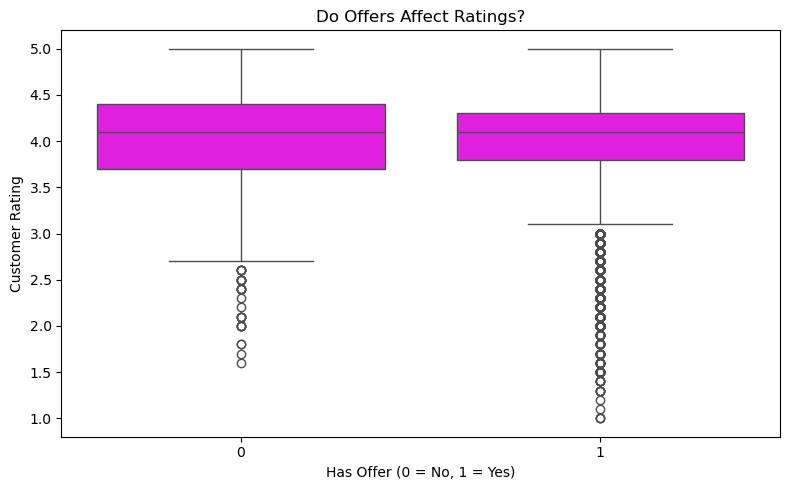

In [39]:
# Do restaurants with offers have better ratings?
plt.figure(figsize=(8,5))
sns.boxplot(x='Has Offer', y='Rating', data=df, color='magenta')
plt.title('Do Offers Affect Ratings?')
plt.xlabel('Has Offer (0 = No, 1 = Yes)')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()

observation:
1. The boxplot showed no strong difference in customer ratings between restaurants with and without offers.
2. This suggests that discounts don’t necessarily lead to higher satisfaction — quality still matters more.

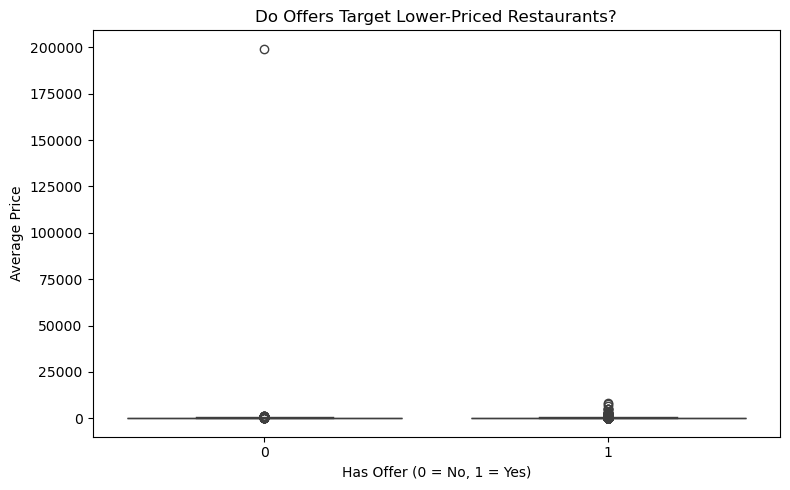

In [41]:
# Are cheaper restaurants more likely to offer discounts?
plt.figure(figsize=(8,5))
sns.boxplot(x='Has Offer', y='Average Price', data=df)
plt.title('Do Offers Target Lower-Priced Restaurants?')
plt.xlabel('Has Offer (0 = No, 1 = Yes)')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

observation:
1. Restaurants with offers tend to be in the lower to mid-price range.
2. This indicates that discounts are more common among affordable restaurants, possibly to attract more customers in a competitive segment.

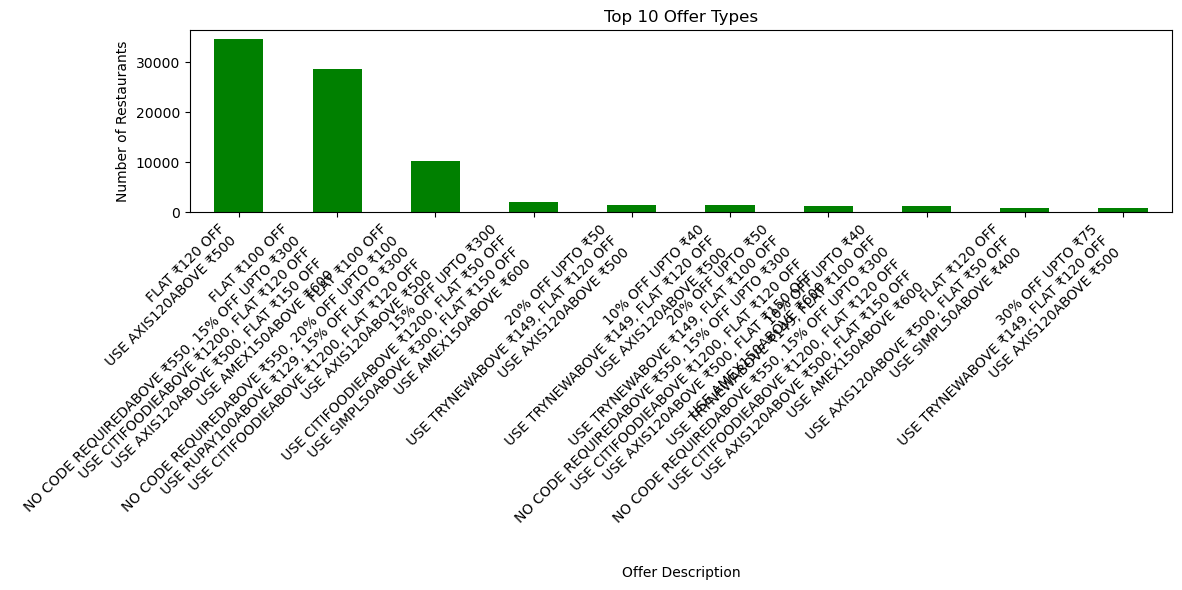

In [43]:
# Most Common Offer Types (Top 10)
plt.figure(figsize=(12,6))
df[df['Offer Name'] != 'No Offer']['Offer Name'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Offer Types')
plt.xlabel('Offer Description')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()

observation:
1. The most frequent offers include percentage-based discounts, cashback, or free delivery.
2. These are likely designed to attract price-sensitive customers, especially in urban markets.

objective 3

In [86]:
import statsmodels.api as sm

# Dependent variable
y = df['Rating']

# Independent variables
features = ['Average Price', 'Number of Ratings', 'Pure Veg', 'Has Offer']
features += [col for col in df.columns if col.startswith('Cuisine_')]
X = df[features]

# Make sure everything is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop any rows with missing values
Xy = pd.concat([X, y], axis=1).dropna()
X = Xy.drop('Rating', axis=1)
y = Xy['Rating']

# Add constant
X = sm.add_constant(X)

# Run regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     296.6
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          3.41e-254
Time:                        17:26:45   Log-Likelihood:                -76126.
No. Observations:              106938   AIC:                         1.523e+05
Df Residuals:                  106933   BIC:                         1.523e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9131      0.01